In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# importing data
df = pd.read_csv('D:\Datasets\Sales_Data_Online\online_sales_dataset.csv')

#cleaning data
#converting datatype to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
#removing nan values

df = df.dropna(subset=['CustomerID'])
#converting ids from float to int

df['CustomerID'] = df['CustomerID'].astype('Int64')

# creating revenue column
df['Revenue'] = df['UnitPrice'] * df['Quantity']

In [17]:
#Count of nan values
nan_count = df['CustomerID'].isna().sum()
nan_count

#removing nan values
df = df.dropna(subset=['CustomerID'])

In [ ]:
#converting ids from float to int
df['CustomerID'] = df['CustomerID'].astype('Int64')

#check if ther are null values in any column
df.isnull().sum()

#check duplicates
df['InvoiceNo'].duplicated()

In [ ]:
# creating revenue column
df['Revenue'] = df['UnitPrice'] * df['Quantity']

#revenue total per invoice
revenue_per_invoice = df.groupby('InvoiceNo')['Revenue'].sum().reset_index()
revenue_per_invoice

In [20]:
invoice_summary = df.groupby('InvoiceNo').agg({
    'Revenue': 'sum',  # Sum of revenue per transaction
    'Quantity': 'sum'       # Sum of quantity per transaction (transaction size)
}).reset_index()

# Calculate the average transaction size and average revenue
average_transaction_size = invoice_summary['Quantity'].mean()
average_revenue_per_transaction = invoice_summary['Revenue'].mean()

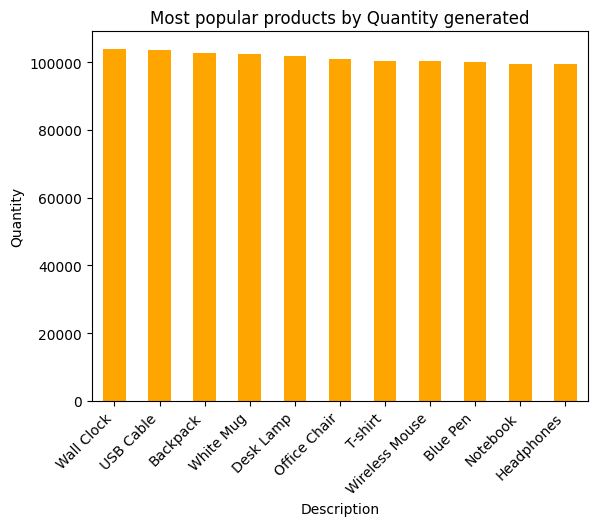

In [12]:
#Most popular products by Quantity generated.
PopularProductsByQuantity = df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
PopularProductsByQuantity.plot(kind='bar', x='Description', color='#FFA500')

# Customizing the legend
plt.legend([],[], frameon=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Quantity')
plt.title('Most popular products by Quantity generated')
plt.show()

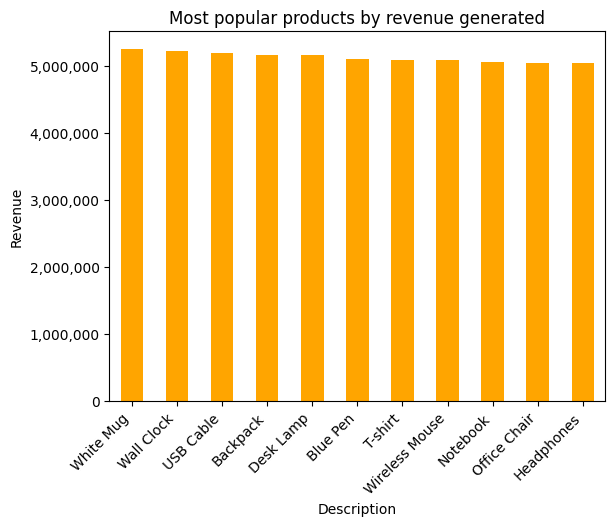

In [14]:
#Most popular products by revenue generated.

PopularProductsByRevenue = df.groupby('Description')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending=False)
PopularProductsByRevenue

ax = PopularProductsByRevenue.plot(kind='bar', x='Description', color='#FFA500')

# Customizing the legend
plt.legend([],[], frameon=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Revenue')
plt.title('Most popular products by revenue generated')


ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.show()


In [16]:
#Identify top customers by purchase volume and revenue.
TopCustomersByPurchaseVolume = df.groupby('CustomerID')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending= False).head(10)
TopCustomersByPurchaseVolume

,CustomerID,Quantity
1759,14461,212
13412,44086,172
5497,24149,169
25831,75447,166
601,11514,160
27140,78858,158
28292,81806,158
14823,47638,156
28228,81631,155
1797,14571,150


In [17]:
TopCustomersByRevenue = df.groupby('CustomerID')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending= False).head(10)
TopCustomersByRevenue

,CustomerID,Revenue
4608,21733,11806.36
1759,14461,11584.55
23101,68777,10987.36
28012,81067,10869.68
34961,98923,10420.53
29319,84431,10332.11
24469,72172,10115.41
16866,52808,10063.92
12648,42177,9946.79
28228,81631,9860.61


In [12]:
#Analyze customer retention: How many customers have repeat purchases?

RepeatedCustomers = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo', ascending= False)

# Filter customers who have made more than one purchase
RepeatedCustomers = RepeatedCustomers[RepeatedCustomers['InvoiceNo'] > 1]

# Count the number of customers with more than one purchase
count_repeated_customers = RepeatedCustomers['CustomerID'].nunique()
count_repeated_customers

8013

In [ ]:
#Which Category contributes the most to sales in terms of quantity?
CategoryWithmostQuantity = df.groupby('Category')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
CategoryWithmostQuantity

,Category,Quantity
3,Furniture,226136
4,Stationery,224723
0,Accessories,222396
2,Electronics,221296
1,Apparel,220933


In [ ]:
#Which Category contributes the most to sales in terms of revenue?
CategoryWithmostRevenue = df.groupby('Category')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
CategoryWithmostRevenue

,Category,Revenue
3,Furniture,11447320.45
0,Accessories,11284508.23
2,Electronics,11256679.36
4,Stationery,11218219.64
1,Apparel,11194617.38


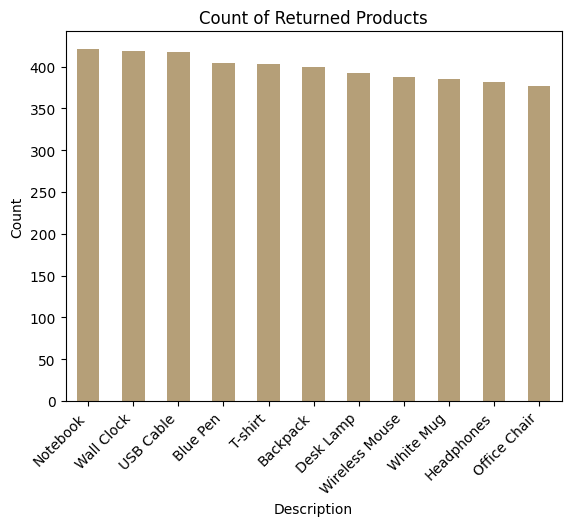

In [21]:
# Count of returned products
ReturnedProducts = df[df['ReturnStatus'] == 'Returned'].groupby('Description').size().reset_index(name='ReturnCount').sort_values(by='ReturnCount', ascending=False)
ReturnedProducts.plot(kind='bar', x='Description', color='#B59F78')

# Customizing the legend
plt.legend([],[], frameon=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Count of Returned Products')

plt.show()


NameError: name 'RegionsRevenue' is not defined

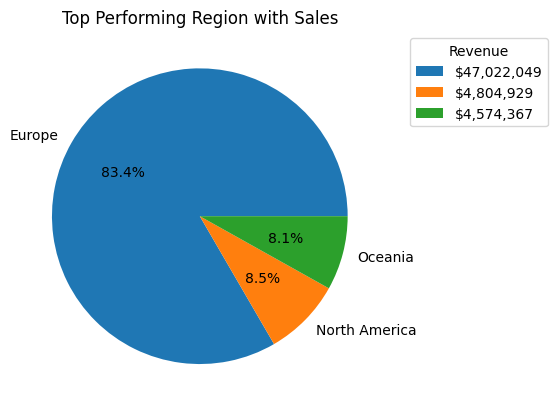

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Defining regions
country_to_region = {'United States': 'North America',
                     'Australia': 'Oceania',
                     'Germany': 'Europe',
                     'Spain': 'Europe',
                     'Italy': 'Europe',
                     'United Kingdom': 'Europe',
                     'Portugal': 'Europe',
                     'France': 'Europe',
                     'Belgium': 'Europe',
                     'Norway': 'Europe',
                     'Sweden': 'Europe',
                     'Netherlands': 'Europe'}

# Creating a 'Region' column and using map
df['Region'] = df['Country'].map(country_to_region)

# Calculating revenue by region
RegionsRevenue = df.groupby('Region')['Revenue'].sum().reset_index()
RegionsRevenue.set_index('Region', inplace=True)

# Setting up labels for the pie chart
pie_labels = RegionsRevenue.index
labels = [f"{region}: ${revenue:,.0f}" for region, revenue in RegionsRevenue['Revenue'].items()]
legend_labels = [f"${revenue:,.0f}" for revenue in RegionsRevenue['Revenue']]

# Plotting the pie chart for top-performing regions
RegionsRevenue.plot(kind='pie', y='Revenue', autopct='%1.1f%%', labels=pie_labels, legend=False, ylabel='', title='Top Performing Region with Sales')

# Creating a custom legend with only revenue values
plt.legend(legend_labels, title='Revenue', bbox_to_anchor=(1.05, 1), loc='best')

plt.show()


In [3]:
#Average shipping cost by country and identify if any specific countries incur higher-than-average costs

AvgShippingCost = df.groupby('Country')['ShippingCost'].mean().reset_index().sort_values(by='ShippingCost', ascending=False)
AvgShippingCost

,Country,ShippingCost
8,Spain,17.798519
5,Netherlands,17.655257
2,France,17.621382
6,Norway,17.604227
1,Belgium,17.460093
7,Portugal,17.443192
11,United States,17.435992
4,Italy,17.434459
10,United Kingdom,17.378774
9,Sweden,17.339467


In [ ]:
#Analyze the most popular PaymentMethod
PopularPaymentMethods = (df.groupby('PaymentMethod').size().reset_index(name='CountOfPopularPaymentMethod').sort_values(by='CountOfPopularPaymentMethod', ascending=False))
PopularPaymentMethods

,PaymentMethod,CountOfPopularPaymentMethod
0,Bank Transfer,15086
1,Credit Card,14907
2,paypall,14811


In [4]:
#Revenue breakdown by SalesChannel to determine which channel performs best
RevenueBySalesChannel = df.groupby('SalesChannel')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
RevenueBySalesChannel


,SalesChannel,Revenue
1,Online,28292246.42
0,In-store,28109098.64


In [6]:
#Compare average order value across different SalesChannels

AvgOnlineSalesOrder = df.groupby('SalesChannel')['Revenue'].mean().reset_index().sort_values(by='Revenue', ascending=False)
AvgOnlineSalesOrder

,SalesChannel,Revenue
0,In-store,1261.402739
1,Online,1256.316448


In [ ]:
#Is there a relationship between returns and specific ShipmentProviders or WarehouseLocations

ReturnsAmongShipmentProviders = df[df['ReturnStatus'] == 'Returned'].groupby('ShipmentProvider').size().reset_index(name='ShipmentProviderReturns').sort_values(by='ShipmentProviderReturns', ascending=False)
ReturnsAmongShipmentProviders   

,ShipmentProvider,ShipmentProviderReturns
1,FedEx,1121
2,Royal Mail,1110
0,DHL,1105
3,UPS,1051


In [6]:
#Investigate the impact of OrderPriority on shipping costs.
OrderPriorityVsShippingCost = df.groupby('OrderPriority')['ShippingCost'].mean().reset_index().sort_values(by='ShippingCost', ascending=False)
OrderPriorityVsShippingCost

,OrderPriority,ShippingCost
0,High,17.541049
1,Low,17.539763
2,Medium,17.372226


In [7]:
#Determine if OrderPriority affects return rates.
ReturnsOnOrderPriority = df[df['ReturnStatus'] == 'Returned'].groupby('OrderPriority').size().reset_index(name='OrderPriorityReturns').sort_values(by='OrderPriorityReturns', ascending=False)
ReturnsOnOrderPriority

,OrderPriority,OrderPriorityReturns
0,High,1479
1,Low,1454
2,Medium,1454


C:\Users\Laptop Solutions\AppData\Local\Temp\ipykernel_17368\1645508870.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='InvoiceDate')['Revenue'].sum().reset_index()


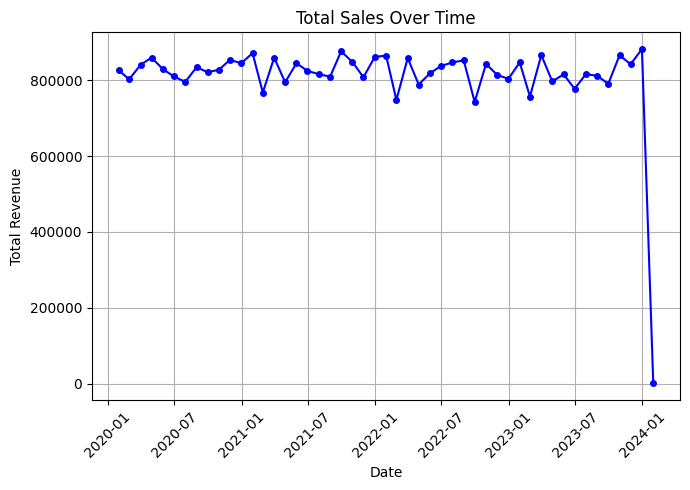

In [12]:
#Displaying sales over time in line chart

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'InvoiceDate' is in datetime format; if not, convert it
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Resample the data by month and sum up the revenue
monthly_sales = df.resample('M', on='InvoiceDate')['Revenue'].sum().reset_index()

# Plot the monthly sales
plt.figure(figsize=(7, 5))
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['Revenue'], marker='o', markersize=4, color='b', linestyle='-')
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
#FilteredDates = df[df['InvoiceDate']>'2024-08-20']
df = df[df['InvoiceDate'] <= '2024-01-01']

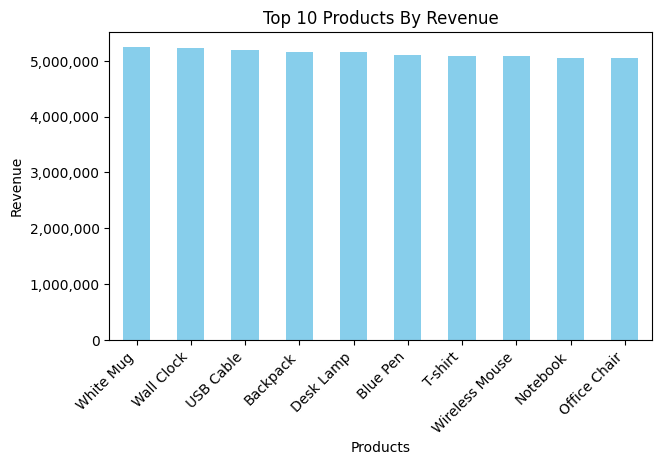

In [21]:
#Bar chart of top 10 products by revenue.

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Top10ProductsByRevenue = df.groupby('Description')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).head(10)

# Assuming Top10ProductsByRevenue DataFrame is already created
ax = Top10ProductsByRevenue.plot(kind='bar', x='Description', y='Revenue', color='skyblue', figsize=(7, 4), legend=False)

plt.title("Top 10 Products By Revenue")
plt.xlabel("Products")
plt.ylabel("Revenue")

# Format y-axis to show commas
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Rotate x-axis labels for readability if they are long
plt.xticks(rotation=45, ha="right")
plt.show()



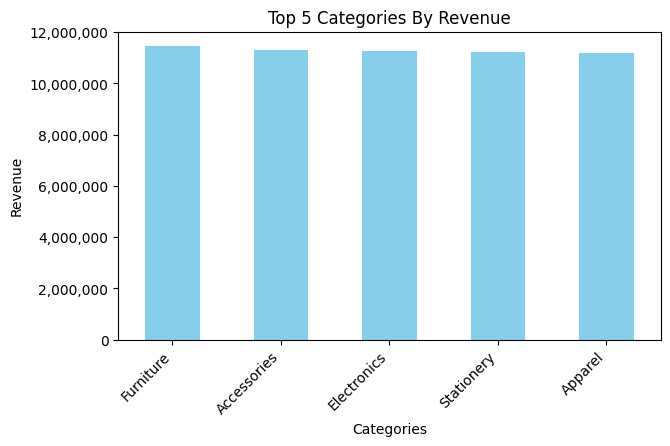

In [22]:
#Bar chart of top 5 categories by revenue.

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Top5CategoriesByRevenue = df.groupby('Category')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).head(10)


# Assuming Top10ProductsByRevenue DataFrame is already created
ax = Top5CategoriesByRevenue.plot(kind='bar', x='Category', y='Revenue', color='skyblue', figsize=(7, 4), legend=False)

plt.title("Top 5 Categories By Revenue")
plt.xlabel("Categories")
plt.ylabel("Revenue")

# Format y-axis to show commas
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Rotate x-axis labels for readability if they are long
plt.xticks(rotation=45, ha="right")
plt.show()




<Axes: >

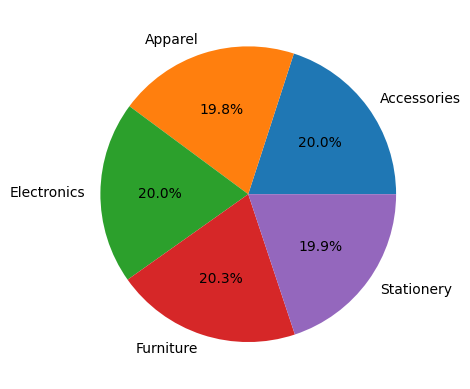

In [ ]:
#Pie chart of revenue share by category

RevenueByCategory = df.groupby('Category')['Revenue'].sum().reset_index()
RevenueByCategory.set_index('Category', inplace=True)  # Set Category as the index for labeling
RevenueByCategory.plot(kind='pie', y='Revenue', autopct='%1.1f%%', legend=False, ylabel='')

In [8]:
#Map visualization showing sales distribution by country.
import plotly.express as px
import pandas as pd



RevenueByCountry = df.groupby('Country')['Revenue'].sum().reset_index()

# Create a choropleth map
fig = px.choropleth(RevenueByCountry, locations="Country",
                    locationmode='country names', color="Revenue",
                    color_continuous_scale="OrRd",
                    title="Revenue Distribution by Country")

fig.show()


In [9]:
fig = px.bar(RevenueByCountry, x='Country', y='Revenue', color='Revenue', title="Revenue by Country", color_continuous_scale="OrRd")
fig.update_layout(width=700, height=400)
fig.show()


<Figure size 1000x600 with 0 Axes>

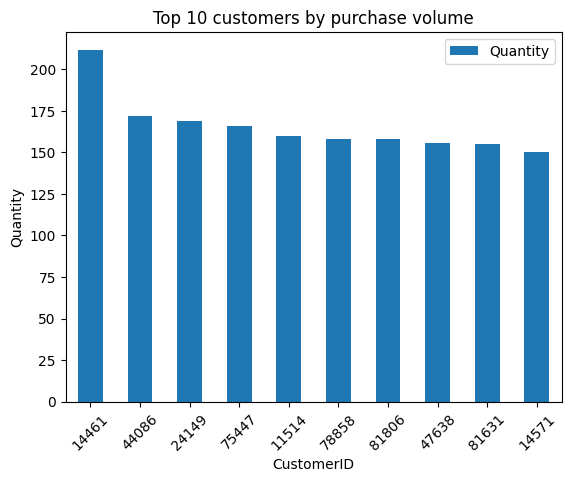

In [ ]:
#Bar chart of top 10 customers by purchase volume

Top_10_customers_by_purchase_volume = df.groupby('CustomerID')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = Top_10_customers_by_purchase_volume.plot(kind='bar', x='CustomerID', y='Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.title("Top 10 customers by purchase volume")  # Set the chart title
plt.ylabel('Quantity')
plt.show()

<Figure size 1000x600 with 0 Axes>

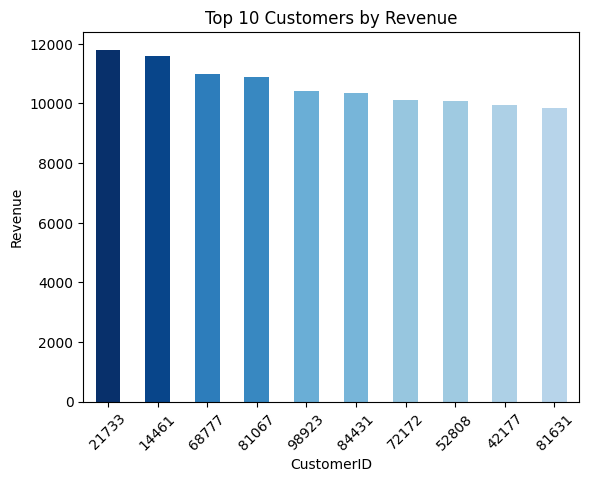

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data for demonstration
Top10CustomersByRevenue = df.groupby('CustomerID')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).head(10)

plt.figure(figsize=(10, 6))

# Define a colormap range to only include mid-to-dark shades
base_color = plt.cm.Blues  # Choose a colormap with shades of a single color, like 'Blues'
norm = plt.Normalize(Top10CustomersByRevenue['Revenue'].min(), Top10CustomersByRevenue['Revenue'].max())
colors = base_color(0.3 + 0.7 * norm(Top10CustomersByRevenue['Revenue']))  # Adjust range to avoid light shades

# Plot the bar chart with gradient colors of one color without light fade
ax = Top10CustomersByRevenue.plot(kind='bar', x='CustomerID', y='Revenue', color=colors, legend=False)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.title("Top 10 Customers by Revenue")  # Set the chart title
plt.ylabel('Revenue')
plt.show()


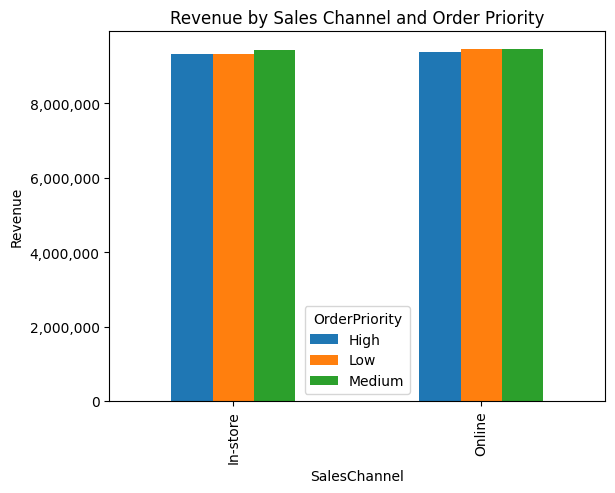

In [10]:
import matplotlib.pyplot as plt

# Group data by 'SalesChannel' and 'OrderPriority' to get the revenue
revenue_by_saleschannel_orderpriority = df.groupby(['SalesChannel', 'OrderPriority'])['Revenue'].sum().unstack().reset_index()

# Plotting a stacked bar chart
ax = revenue_by_saleschannel_orderpriority.plot(kind='bar', x='SalesChannel', stacked=False)
plt.ylabel('Revenue')
plt.title('Revenue by Sales Channel and Order Priority')

# Set y-axis format to display revenue in full range
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))


plt.show()


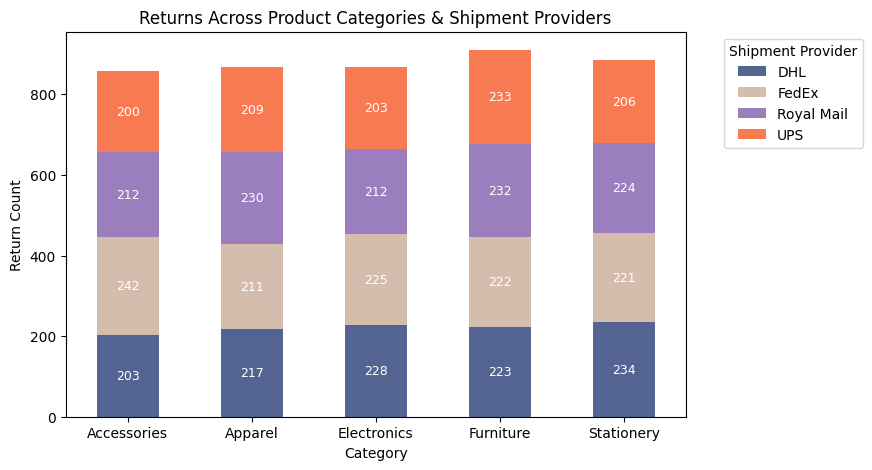

In [33]:
#Stacked bar chart showing return rate across product categories or shipment providers.

import matplotlib.pyplot as plt

# Creating the stacked bar chart
Return_rate_across_product_categories = df[df['ReturnStatus'] == 'Returned'].groupby(['Category', 'ShipmentProvider']).size().unstack().reset_index()
ax = Return_rate_across_product_categories.plot(kind='bar', x='Category', stacked=True, color=['#536493', '#D4BDAC', '#9B7EBD', '#F87A53'], figsize=(8, 5))

# Customizing the legend
plt.legend(title='Shipment Provider', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.ylabel('Return Count')
plt.title('Returns Across Product Categories & Shipment Providers')

# Adding numbers inside the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='white')  # Adds labels inside each segment


plt.show()

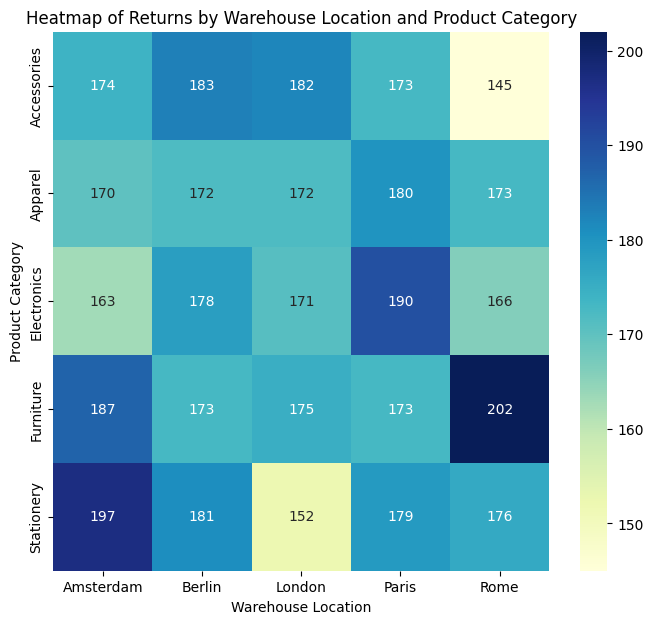

In [ ]:
#Heatmap of returns by warehouse location and product category.

Returns_by_location_product_categories = df[df['ReturnStatus'] == 'Returned'].groupby(['Category', 'WarehouseLocation']).size()
# Reshape the data with unstack() for heatmap
Returns_by_location_product_categories = Returns_by_location_product_categories.unstack()

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 7))
sns.heatmap(Returns_by_location_product_categories, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Warehouse Location")
plt.ylabel("Product Category")
plt.title("Heatmap of Returns by Warehouse Location and Product Category")
plt.show()

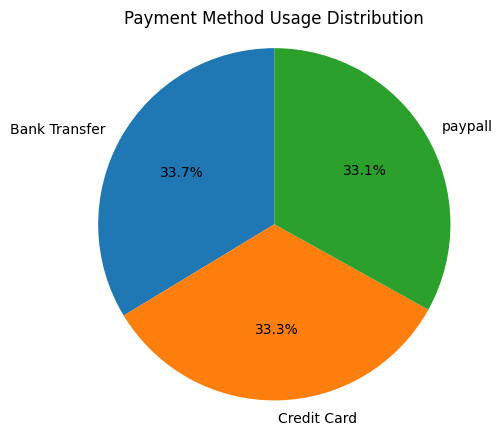

In [ ]:
#Pie or bar chart showing the distribution of PaymentMethod usage

#PaymentMethodUsage = df.groupby('PaymentMethod').count().reset_index()



import matplotlib.pyplot as plt

# Group by PaymentMethod and count occurrences
PaymentMethodUsage = df.groupby('PaymentMethod').count().reset_index()

# Plot a pie chart showing the distribution
plt.figure(figsize=(5, 5))
plt.pie(PaymentMethodUsage['InvoiceNo'], labels=PaymentMethodUsage['PaymentMethod'], autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Usage Distribution')
plt.axis('equal')
plt.show()

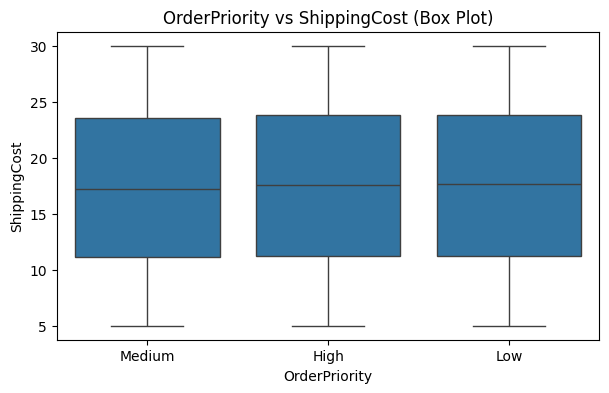

In [13]:
#Scatter plot of OrderPriority vs. ShippingCost or box plot if you prefer a clearer view.

plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='OrderPriority', y='ShippingCost')
plt.title('OrderPriority vs ShippingCost (Box Plot)')
plt.xlabel('OrderPriority')
plt.ylabel('ShippingCost')
plt.show()
